In [1]:
import numpy as np
import cv2
from iced import filter
from iced import normalization
from utility import *
import matplotlib.pyplot as plt
from matplotlib import colors
from iced import normalization
from iced import filter
from scipy.stats import t
import os
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/bzr0014/watson/scripts/virt/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#Defining the file directory
data_names = ["ALL"]
directories = {}
for data_name in data_names:
    directories[data_name] = \
    "../data/extracted_all_contact_%s"%data_name
print(directories)

{'ALL': '../data/extracted_all_contact_ALL'}


In [117]:
#create the full chrmosomal contact map for the cell line
nss = {}
mss = {}
for data_name in data_names:
    N = 0
    M = 0
    nss[data_name] = np.zeros((24, 2), dtype='uint32')
    mss[data_name] = np.zeros((24, 2), dtype='uint32')
    for chr1 in range(1, 24):
        chr2 = chr1
        mit = readMat("%s/chr_%02d_%02d_500kb.mat"%\
                      (directories[data_name], chr1, chr2), delimiter="\t")
        n, m = mit.shape
        nss[data_name][chr1, 0] = N
        nss[data_name][chr1, 1] = n
        mss[data_name][chr1, 0] = M
        mss[data_name][chr1, 1] = m
        N += n
        M += m
        #print(chr1, n, m)
    print(N, M)
    #print(ns, ms)


file directory: ../data/extracted_all_contact_ALL/chr_01_01_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_02_02_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_03_03_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_04_04_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_05_05_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_06_06_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_07_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_08_08_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_09_09_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_10_10_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_11_11_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_12_12_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_13_13_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_14_14_500kb.mat
file directory: ../d

In [118]:
grand_scheme_of_things = {}
for name in data_names:
    grand_scheme_of_things[name] = np.zeros((N, M))
    for chr1 in range(1, 24):
        for chr2 in range(chr1, 24):
            mit = readMat("%s/chr_%02d_%02d_500kb.mat"%\
                          (directories[name], chr1, chr2), delimiter="\t")
            beg_n = nss[name][chr1, 0]
            n0 = nss[name][chr1, 1]
            beg_m = mss[name][chr2, 0]
            m0 = mss[name][chr2, 1]
            n1, m1 = mit.shape
            n = np.min([n0, n1])
            m = np.min([m0, m1])
            #print(chr1, chr2, beg_n, n, beg_m, m)
            grand_scheme_of_things[name][beg_n:beg_n+n, beg_m:beg_m+m] = mit[:n,:m]
            grand_scheme_of_things[name][beg_m:beg_m+m, beg_n:beg_n+n] = mit.T[:m,:n]

file directory: ../data/extracted_all_contact_ALL/chr_01_01_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_02_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_03_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_04_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_05_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_06_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_07_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_08_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_09_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_10_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_11_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_12_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_13_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_01_14_500kb.mat
file directory: ../d

file directory: ../data/extracted_all_contact_ALL/chr_06_22_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_06_23_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_07_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_08_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_09_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_10_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_11_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_12_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_13_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_14_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_15_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_16_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_17_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_07_18_500kb.mat
file directory: ../d

file directory: ../data/extracted_all_contact_ALL/chr_16_20_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_16_21_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_16_22_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_16_23_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_17_17_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_17_18_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_17_19_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_17_20_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_17_21_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_17_22_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_17_23_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_18_18_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_18_19_500kb.mat
file directory: ../data/extracted_all_contact_ALL/chr_18_20_500kb.mat
file directory: ../d

Number of rows and columns: 1, 1


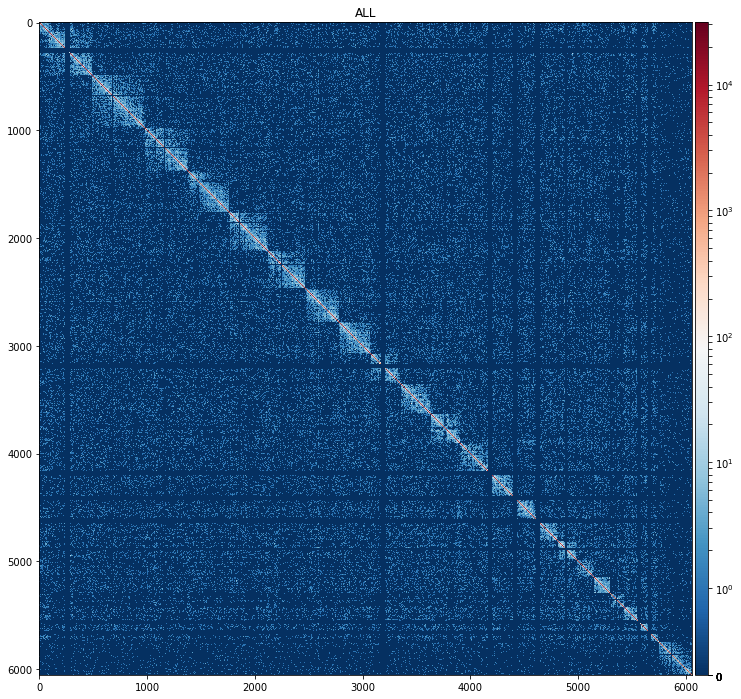

In [120]:
pylab.rcParams['figure.figsize'] = (15, 12)
#fig, axes = plt.subplots(ncols=1)
#m = axes.imshow(grand_scheme_of_things, cmap="RdBu_r", norm=colors.SymLogNorm(1))
#cb = fig.colorbar(m)
#plt.show()
images = []
for name in data_names:
    images.append(grand_scheme_of_things[name])
showImages(images, len(grand_scheme_of_things),\
           color_bar = True, titles=data_names)

In [121]:
normed = {}
for name in data_names:
    normed[name] = filter.filter_low_counts\
    (grand_scheme_of_things[name] * 1., lengths=nss[name][:, 1], percentage=0.04)

In [122]:
for name in data_names:
    normed[name] = \
        normalization.ICE_normalization(normed[name])

Number of rows and columns: 1, 1


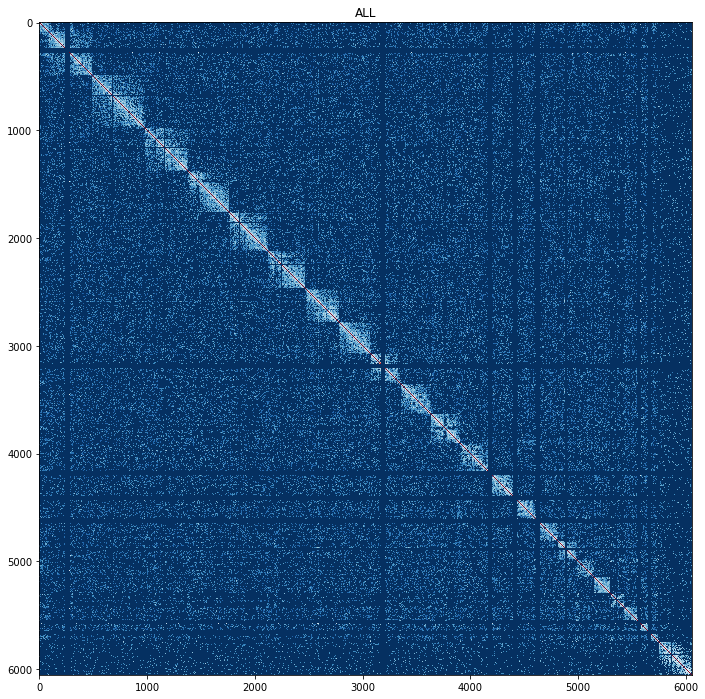

In [123]:
pylab.rcParams['figure.figsize'] = (15, 12)
images = []
for name in data_names:
    images.append(normed[name])
showImages(images, color_bar=False, titles=data_names)

In [5]:
#writeMatToFile(grand_scheme_of_things, "%s/all_in_one_500kb.mat"%(directory) , delimiter=",")
for name in data_names:
    fileName = "%s/all_in_one_500kb.npy"%(directories[name])
    if os.path.isfile(fileName):
        print("File Already Exists")
    else:
        np.save(fileName, grand_scheme_of_things[name])

File Already Exists


In [6]:
#writeMatToFile(ns, "%s/lengths_500kb.mat"%(directory) , delimiter=",")
for name in data_names:
    fileName = "%s/lengths_500kb.npy"%(directories[name])
    if os.path.isfile(fileName):
        print("File Already Exists")
    else:
        np.save(fileName, nss[name])

File Already Exists


In [7]:
images = []
for name in data_names:
    print(grand_scheme_of_things[name].shape)
    images.append(grand_scheme_of_things[name][:500, :500])
showImages(images)

NameError: name 'grand_scheme_of_things' is not defined

In [144]:
pylab.rcParams['figure.figsize'] = (15, 20)
k = (2, 2, 2, 2)
method = 'max'
t = 0
params = None
symmetric=True
local_thresholds_normed = {}
local_thresholds_original = {}
for name in data_names:
    local_thresholds_normed[name] = \
    local_threshold(((normed[name][:400, :400]+1e-5)),\
            k = k, method=method, t = t,\
            params=params, symmetric=symmetric)
    local_thresholds_original[name] = \
    local_threshold(((grand_scheme_of_things[name][:400, :400]+1e-5)),\
            k = k, method=method, t = t,\
            params=params, symmetric=symmetric)

(2, 2, 2, 2)
(2, 2, 2, 2)


Number of rows and columns: 1, 4


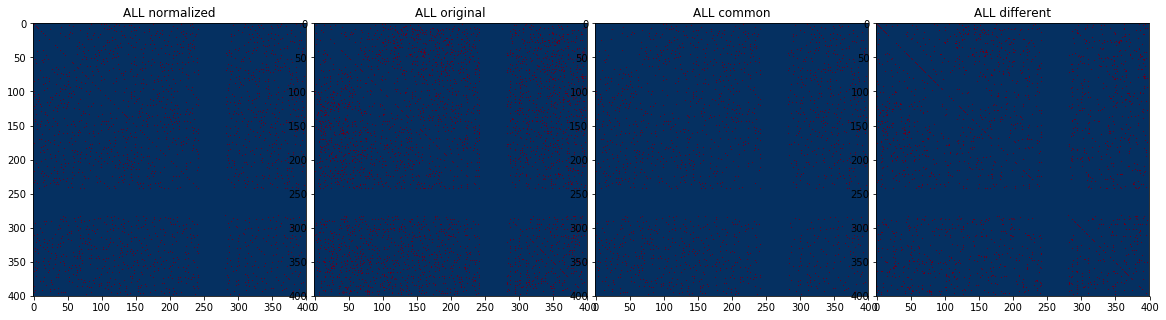

In [154]:
pylab.rcParams['figure.figsize'] = (20, 20)
images = []
titles = []
for name in data_names:
    images.append(local_thresholds_normed[name])
    images.append(local_thresholds_original[name])
    images.append(local_thresholds_normed[name] \
                  * local_thresholds_original[name])
    images.append((local_thresholds_normed[name] \
                  - local_thresholds_original[name]) != 0)        
    titles.append("%s normalized"%name)
    titles.append("%s original"%name)
    titles.append("%s common"%(name))
    titles.append("%s different"%(name))
showImages(images, rows=len(data_names), titles=titles)